In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,375820,0,0,76561197993329931,553,11,-1,9.4,"March 7, 2018",sorry but this is utter ♥♥♥♥.
1,375820,1,0,76561198090124060,91,5,1,7.8,"March 7, 2018",I really enjoy this game. Not only the puzzles...
2,375820,7,0,76561197993538800,407,15,-1,7.8,"March 6, 2018","Cool concept, but it got old very quickly. If..."
3,375820,1,0,acru_,871,12,1,9.2,"March 6, 2018",Game is fun and challenging with optimizations...
4,375820,1,0,76561198088115163,357,6,1,4.2,"March 6, 2018",Brilliant - I love their art style and their g...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,9.4,"March 7, 2018",sorry but this is utter ♥♥♥♥.
1,1,0,1,7.8,"March 7, 2018",I really enjoy this game. Not only the puzzles...
2,7,0,-1,7.8,"March 6, 2018","Cool concept, but it got old very quickly. If..."
3,1,0,1,9.2,"March 6, 2018",Game is fun and challenging with optimizations...
4,1,0,1,4.2,"March 6, 2018",Brilliant - I love their art style and their g...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1
5,"March 2, 2018","This game is super fun and challenging, if you...",21,1,7.6,1
6,"February 11, 2018",This game is both a very good puzzle game and ...,1,0,20.0,1
7,"February 11, 2018","The game is alright, but just feels inferior t...",23,1,12.8,-1
8,"February 4, 2018",About a year's worth of a degree course in com...,1,0,20.6,1
9,"February 4, 2018",Human Resource Machine is a small game about p...,8,0,74.6,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  1094 non-null   object 
 1   Review_Text     1092 non-null   object 
 2   Num_Helpful     1094 non-null   int64  
 3   Num_Funny       1094 non-null   int64  
 4   Hours_Played    1094 non-null   float64
 5   Recommend       1094 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 51.4+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18472/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1,1520380800
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1,1520380800
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1,1520294400
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1,1520294400
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1,1520294400


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18472/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1,1520380800,2513
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1,1520380800,2513
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1,1520294400,2513
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1,1520294400,2513
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1,1520294400,2513


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1,1520380800,2513
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1,1520380800,2513
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1,1520294400,2513
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1,1520294400,2513
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1,1520294400,2513


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2513,"March 7, 2018",sorry but this is utter ♥♥♥♥.
1,2513,"March 7, 2018",I really enjoy this game. Not only the puzzles...
2,2513,"March 6, 2018","Cool concept, but it got old very quickly. If..."
3,2513,"March 6, 2018",Game is fun and challenging with optimizations...
4,2513,"March 6, 2018",Brilliant - I love their art style and their g...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2389,"October 15, 2015",6
1,2389,"October 16, 2015",24
2,2389,"October 17, 2015",28
3,2389,"October 18, 2015",22
4,2389,"October 19, 2015",24
...,...,...,...
647,2698,"September 21, 2021",1
648,2700,"October 5, 2021",1
649,2700,"October 6, 2021",1
650,2701,"October 10, 2021",1


<AxesSubplot:>

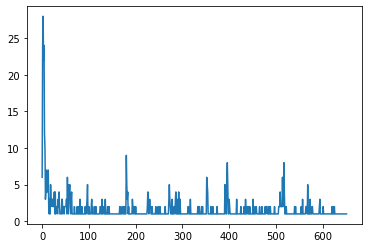

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

1094

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.677914110429448

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2389,126
1,2390,27
2,2391,22
3,2392,8
4,2393,18
...,...,...
259,2697,3
260,2698,1
261,2700,2
262,2701,1


<AxesSubplot:>

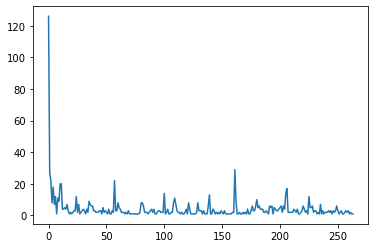

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

1094

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

4.143939393939394

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1,1520380800,2513
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1,1520380800,2513
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1,1520294400,2513
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1,1520294400,2513
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1,1520294400,2513


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2389,1864
1,2390,32
2,2391,65
3,2392,130
4,2393,12
...,...,...
259,2697,10
260,2698,0
261,2700,1
262,2701,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2389,389,0,0.0,14.793651
2390,17,0,0.0,1.185185
2391,33,0,1.0,2.954545
2392,99,1,1.0,16.250000
2393,5,0,0.0,0.666667
...,...,...,...,...
2697,5,1,4.0,3.333333
2698,0,0,0.0,0.000000
2700,1,0,0.5,0.500000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

3498

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.197440585009141

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2389,1612
1,2390,0
2,2391,30
3,2392,4
4,2393,1
...,...,...
259,2697,5
260,2698,0
261,2700,0
262,2701,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2389,538,0,0.0,12.793651
2390,0,0,0.0,0.000000
2391,28,0,0.0,1.363636
2392,4,0,0.0,0.500000
2393,1,0,0.0,0.055556
...,...,...,...,...
2697,4,0,1.0,1.666667
2698,0,0,0.0,0.000000
2700,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

1919

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

1.7541133455210238

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2389,1247.8
1,2390,335.4
2,2391,186.4
3,2392,72.7
4,2393,134.5
...,...,...
259,2697,60.6
260,2698,15.6
261,2700,24.4
262,2701,6.1


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2389,78.0,0.3,5.75,9.903175
2390,101.0,2.0,8.50,12.422222
2391,22.7,1.7,7.25,8.472727
2392,24.4,1.9,7.10,9.087500
2393,24.0,2.9,4.75,7.472222
...,...,...,...,...
2697,30.0,14.1,16.50,20.200000
2698,15.6,15.6,15.60,15.600000
2700,16.9,7.5,12.20,12.200000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

14165.099999999999

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

12.94798903107861

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2389,0.888889
1,2390,0.851852
2,2391,1.000000
3,2392,0.750000
4,2393,1.000000
...,...,...
259,2697,0.333333
260,2698,1.000000
261,2700,1.000000
262,2701,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2389,1,-1,1.0,0.888889
2390,1,-1,1.0,0.851852
2391,1,1,1.0,1.000000
2392,1,-1,1.0,0.750000
2393,1,1,1.0,1.000000
...,...,...,...,...
2697,1,-1,1.0,0.333333
2698,1,1,1.0,1.000000
2700,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

936

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8555758683729433

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,9.4,-1,1520380800,2513
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,7.8,1,1520380800,2513
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,7.8,-1,1520294400,2513
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,9.2,1,1520294400,2513
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,4.2,1,1520294400,2513


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"March 7, 2018",sorry but this is utter ♥♥♥♥.,0,0,0.013862,0.0,0.397453,2513
1,"March 7, 2018",I really enjoy this game. Not only the puzzles...,1,0,0.011477,1.0,0.397453,2513
2,"March 6, 2018","Cool concept, but it got old very quickly. If...",7,0,0.011477,0.0,0.396999,2513
3,"March 6, 2018",Game is fun and challenging with optimizations...,1,0,0.013564,1.0,0.396999,2513
4,"March 6, 2018",Brilliant - I love their art style and their g...,1,0,0.006111,1.0,0.396999,2513
...,...,...,...,...,...,...,...,...
1089,"June 18, 2020",Very nice game. I write this comment for one t...,0,0,0.022060,1.0,0.776717,2633
1090,"June 18, 2020","roligt spel med svåra utmaningar, kan rekomend...",0,0,0.010881,1.0,0.776717,2633
1091,"June 11, 2020","JUego solo si te gusta pensar, porque te provo...",0,0,0.003428,1.0,0.773533,2632
1092,"June 8, 2020",you learn the ASSEMBLY LANGUAGE!do you want so...,4,1,0.045908,1.0,0.772169,2631


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18472/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 22, 2021",yuh,0,0,0.019079,1.0,1.000000,2703
1,"October 10, 2021",As funny as its sequel!!,0,0,0.008943,1.0,0.994543,2701
2,"October 6, 2021","As a full time developer, there is nothing bet...",0,0,0.025041,1.0,0.992724,2700
3,"October 5, 2021",Awesome game to teach children what assembly l...,1,0,0.011030,1.0,0.992269,2700
4,"September 21, 2021",very very good,0,0,0.023103,1.0,0.985903,2698
5,"September 13, 2021",game for nerds,1,4,0.044567,0.0,0.982265,2697
6,"September 12, 2021",Good game to learn about code structure. It ge...,4,0,0.024445,1.0,0.981810,2697
7,"September 11, 2021",This game made me realise my job would be much...,5,1,0.020867,1.0,0.981355,2697
8,"September 8, 2021",This is a great game if you like puzzles in th...,1,0,0.655835,1.0,0.979991,2696
9,"September 5, 2021",Its ok,2,1,1.000000,1.0,0.978627,2696


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2389    [A pleasant 3 days of fun. The game lacks repl...
2390    [A more user-friendly version of TIS-100, thou...
2391    [This game is incredibly well designed and imp...
2392    [I love these developers art style so much! Th...
2393    [Fun, charming, and a great way to get the pla...
2394    [Gave me a headache lmao. 10/10, Good except f...
2395    [After 5 hours of playing this game I am now a...
2396    [Amazing little puzzle game, teaching you the ...
2397    [This game is fun, Its art style is nice to lo...
2398    [Overall, I love this game. Computer scientist...
2399    [Another game of the creators of Little Infern...
2400    [I highly recommend this game even I haven't f...
2401    [Great game, would be better if it had tutoria...
2402    [I long for the interface of TIS-100. I still ...
2403    [One of the most unique puzzle games I've ever...
2404    [This is an awesome game.  If are you in to pu...
2405    [If you take all the information about this ga..

In [52]:
# storing data in JSON format
df_text_list.to_json('hrmachine_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('hrmachine_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2389  [A pleasant 3 days of fun. The game lacks repl...
1    Review_Text   2390  [A more user-friendly version of TIS-100, thou...
2    Review_Text   2391  [This game is incredibly well designed and imp...
3    Review_Text   2392  [I love these developers art style so much! Th...
4    Review_Text   2393  [Fun, charming, and a great way to get the pla...
5    Review_Text   2394  [Gave me a headache lmao. 10/10, Good except f...
6    Review_Text   2395  [After 5 hours of playing this game I am now a...
7    Review_Text   2396  [Amazing little puzzle game, teaching you the ...
8    Review_Text   2397  [This game is fun, Its art style is nice to lo...
9    Review_Text   2398  [Overall, I love this game. Computer scientist...
10   Review_Text   2399  [Another game of the creators of Little Infern...
11   Review_Text   2400  [I highly recommend this game even I haven't f...
12   Review_Text   2401  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('hrmachine_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18472/3624034371.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('hrmachine_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18472/1460935888.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('hrmachine_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])